Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 2

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categorcals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [29]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [30]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [32]:
from sklearn.model_selection import train_test_split
import numpy as np
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=7)
train.shape, val.shape

((47520, 41), (11880, 41))

In [33]:
def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    X['gps_height'] = X['gps_height'].replace([-90], X['gps_height'].mean())
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    cols_with_zeros = ['longitude', 'latitude', 'construction_year', 'population']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
    #X.date_recorded = X['date_recorded'].str[:4]#.astype('float64')
    #X.construction_year = X['construction_year'].astype('str').str[:4].astype('float64')
    # quantity & quantity_group are duplicates, num_private has no discernible use.
    X = X.drop(columns=['quantity_group','num_private', 'recorded_by', 'payment_type', 'id'])
    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    
    # Extract components from date_recorded, then drop the original column
    X['year_recorded'] = X['date_recorded'].dt.year
    X['month_recorded'] = X['date_recorded'].dt.month
    X['day_recorded'] = X['date_recorded'].dt.day
    X = X.drop(columns='date_recorded')
    X['years'] = X['year_recorded'] - X['construction_year']
    X['years_MISSING'] = X['years'].isnull()
    
    # return the wrangled dataframe
    return X


train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [34]:
train.shape, val.shape, test.shape

((47520, 40), (11880, 40), (14358, 39))

In [35]:
train.dtypes

amount_tsh               float64
funder                    object
gps_height               float64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population               float64
public_meeting            object
scheme_management         object
scheme_name               object
permit                    object
construction_year        float64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
water_quality             object
quality_group             object
quantity                  object
source                    object
source_typ

In [36]:
# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target & id
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 130].index.tolist()

ordinal_features = cardinality[cardinality >= 130].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features #+ ordinal_features
print(features)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'population', 'construction_year', 'year_recorded', 'month_recorded', 'day_recorded', 'years', 'basin', 'region', 'lga', 'public_meeting', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'water_quality', 'quality_group', 'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'years_MISSING']


In [37]:
train_features.select_dtypes(exclude='number').nunique().sort_values()

years_MISSING                2
permit                       2
public_meeting               2
source_class                 3
quantity                     5
management_group             5
quality_group                6
waterpoint_type_group        6
source_type                  7
waterpoint_type              7
payment                      7
extraction_type_class        7
water_quality                8
basin                        9
source                      10
management                  12
scheme_management           12
extraction_type_group       13
extraction_type             18
region                      21
lga                        125
funder                    1683
installer                 1907
ward                      2081
scheme_name               2530
subvillage               17322
wpt_name                 30715
dtype: int64

In [38]:
train_features.select_dtypes(exclude='object').nunique().sort_values()

years_MISSING            2
year_recorded            5
month_recorded          12
district_code           20
region_code             27
day_recorded            31
construction_year       54
years                   59
amount_tsh              94
population             967
gps_height            2397
longitude            46018
latitude             46018
dtype: int64

In [39]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [40]:
train.corr()

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,year_recorded,month_recorded,day_recorded,years,years_MISSING
amount_tsh,1.000000,0.075881,0.010044,-0.050005,-0.024817,-0.022061,-0.002262,0.003737,-0.003629,-0.038024,0.001750,-0.006323,-0.069396
gps_height,0.075881,1.000000,-0.019897,0.026626,-0.182991,-0.170252,-0.045082,-0.008464,0.319214,-0.282877,-0.008168,0.019458,-0.660055
longitude,0.010044,-0.019897,1.000000,-0.296675,0.146198,0.253094,-0.098552,0.025238,0.115586,-0.385318,0.017644,-0.032498,-0.455083
latitude,-0.050005,0.026626,-0.296675,1.000000,-0.244056,-0.193424,0.049402,0.037003,0.161651,0.321637,-0.008364,-0.015371,0.174623
region_code,-0.024817,-0.182991,0.146198,-0.244056,1.000000,0.678855,0.081144,-0.006729,0.165989,-0.098433,0.073375,0.019683,-0.029866
district_code,-0.022061,-0.170252,0.253094,-0.193424,0.678855,1.000000,0.037691,0.007745,0.016147,-0.108487,0.054341,-0.005227,-0.047194
population,-0.002262,-0.045082,-0.098552,0.049402,0.081144,0.037691,1.000000,0.030266,0.038398,-0.005870,0.038139,-0.027003,0.023146
construction_year,0.003737,-0.008464,0.025238,0.037003,-0.006729,0.007745,0.030266,1.000000,0.020893,0.005880,-0.065573,-0.996915,NaN
year_recorded,-0.003629,0.319214,0.115586,0.161651,0.165989,0.016147,0.038398,0.020893,1.000000,-0.306848,0.022937,0.057637,-0.354247
month_recorded,-0.038024,-0.282877,-0.385318,0.321637,-0.098433,-0.108487,-0.005870,0.005880,-0.306848,1.000000,-0.188839,-0.023079,0.500442


In [41]:
X_train.corr()

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,year_recorded,month_recorded,day_recorded,years,years_MISSING
amount_tsh,1.000000,0.075881,0.010044,-0.050005,-0.024817,-0.022061,-0.002262,0.003737,-0.003629,-0.038024,0.001750,-0.006323,-0.069396
gps_height,0.075881,1.000000,-0.019897,0.026626,-0.182991,-0.170252,-0.045082,-0.008464,0.319214,-0.282877,-0.008168,0.019458,-0.660055
longitude,0.010044,-0.019897,1.000000,-0.296675,0.146198,0.253094,-0.098552,0.025238,0.115586,-0.385318,0.017644,-0.032498,-0.455083
latitude,-0.050005,0.026626,-0.296675,1.000000,-0.244056,-0.193424,0.049402,0.037003,0.161651,0.321637,-0.008364,-0.015371,0.174623
region_code,-0.024817,-0.182991,0.146198,-0.244056,1.000000,0.678855,0.081144,-0.006729,0.165989,-0.098433,0.073375,0.019683,-0.029866
district_code,-0.022061,-0.170252,0.253094,-0.193424,0.678855,1.000000,0.037691,0.007745,0.016147,-0.108487,0.054341,-0.005227,-0.047194
population,-0.002262,-0.045082,-0.098552,0.049402,0.081144,0.037691,1.000000,0.030266,0.038398,-0.005870,0.038139,-0.027003,0.023146
construction_year,0.003737,-0.008464,0.025238,0.037003,-0.006729,0.007745,0.030266,1.000000,0.020893,0.005880,-0.065573,-0.996915,NaN
year_recorded,-0.003629,0.319214,0.115586,0.161651,0.165989,0.016147,0.038398,0.020893,1.000000,-0.306848,0.022937,0.057637,-0.354247
month_recorded,-0.038024,-0.282877,-0.385318,0.321637,-0.098433,-0.108487,-0.005870,0.005880,-0.306848,1.000000,-0.188839,-0.023079,0.500442


In [42]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    StandardScaler(), 
    LogisticRegression(multi_class='auto', solver='lbfgs', n_jobs=-1)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score on val
print('Validation Accuracy', pipeline.score(X_val, y_val))

# Predict on test
y_pred = pipeline.predict(X_test)

Validation Accuracy 0.7556397306397307


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

model = pipeline.named_steps['logisticregression']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
coefficients = pd.Series(model.coef_[0], encoded_columns)
plt.figure(figsize=(10,30))
coefficients.sort_values().plot.barh(color='grey');
plt.title('Logistic Regression coefficients for class="functional"');

## I'm testing to see what I would get form yesterday's accuracy for baseline when I test random forests

In [43]:
from sklearn.tree import DecisionTreeClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(min_samples_leaf=61, random_state=7)
)

pipeline.fit(X_train, y_train)
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))

y_pred = pipeline.predict(X_test)

Train Accuracy 0.7721170033670034
Validation Accuracy 0.7638888888888888


# This submission got me a .76 score in the ledearboard

In [ ]:
y_pred = pipeline.predict(X_test)
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('your-submission-filename.csv', index=False)
!kaggle competitions submit -c ds8-predictive-modeling-challenge -f your-submission-filename.csv -m "First submit through API"

In [ ]:
# %matplotlib inline
# import matplotlib.pyplot as plt

# encoder = pipeline.named_steps['onehotencoder']
# encoded_columns = encoder.transform(X_val).columns
# importances = pd.Series(model.feature_importances_, encoded_columns)
# plt.figure(figsize=(10,30))
# importances.sort_values().plot.barh(color='grey');

In [44]:
%%time
# WARNING: the %%time command sometimes has quirks/bugs

from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))

# Equivalent to:
# from sklearn.metrics import accuracy_score
# y_pred = pipeline.predict(X_val)
# print(accuracy_score(y_val, y_pred))

Train Accuracy 0.9977483164983165
Validation Accuracy 0.8092592592592592
Wall time: 12.8 s


# This submission got me a .81 score in the ledearboard

In [ ]:
y_pred = pipeline.predict(X_test)
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('your-submission-filename.csv', index=False)
!kaggle competitions submit -c ds8-predictive-modeling-challenge -f your-submission-filename.csv -m "First submit through API"

### Here I will try to use my method on the entire dataset not just on test

In [57]:
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

X = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
X_wrangle = wrangle(X)
y_final = X_wrangle[target]
X_final = X_wrangle[features]

# Fit on train, score on val
# pipeline.fit(X_final, y_final)
# print('Final Accuracy', pipeline.score(X_final, y_final))
#print('Validation Accuracy', pipeline.score(X_val, y_val))

## I have earned a higher score by including the val in my final submission. I will continue to submit with a final score from now on.

In [ ]:
y_pred = pipeline.predict(X_test)
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('your-submission-filename.csv', index=False)
!kaggle competitions submit -c ds8-predictive-modeling-challenge -f your-submission-filename.csv -m "First submit through API"

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

encoder = pipeline.named_steps['onehotencoder']
encoded = encoder.transform(X_train)
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded.columns)

# Plot feature importances
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

ValueError: Must train encoder before it can be used to transform data.

# The following will test ordinal and it's effects on my score. In the end I want to try to implement both hot encoding and ordinal into my final submission.

In [67]:
# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target & id
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 130].index.tolist()

ordinal_features = cardinality[cardinality >= 130].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features + ordinal_features
print(features)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'population', 'construction_year', 'year_recorded', 'month_recorded', 'day_recorded', 'years', 'basin', 'region', 'lga', 'public_meeting', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'water_quality', 'quality_group', 'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'years_MISSING', 'funder', 'installer', 'wpt_name', 'subvillage', 'ward', 'scheme_name']


In [52]:
#most frequent did not improve my score, actually made it worse. And 1000 forrests made it worse.
#%%time
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=1000, random_state=7, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8125420875420876


In [53]:
#once I include the final score I can no longer use X_val to make a note of any worthy upgrades to my feature engineering.
pipeline.fit(X_final, y_final)
print('Final Accuracy', pipeline.score(X_val, y_val))

Final Accuracy 0.9975589225589225


## This score got me a .82 

In [ ]:
pipeline.fit(X_final, y_final)
print('Final Accuracy', pipeline.score(X_final, y_final))
y_pred = pipeline.predict(X_test)
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('your-submission-filename.csv', index=False)
!kaggle competitions submit -c ds8-predictive-modeling-challenge -f your-submission-filename.csv -m "First submit through API"

X_train shape after encoding (47520, 33)


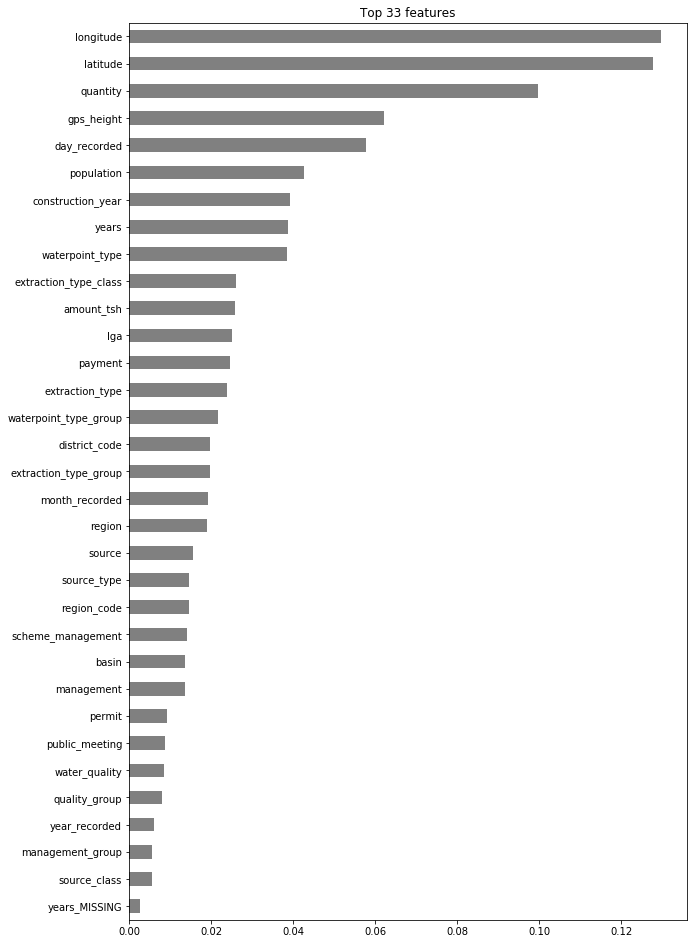

In [54]:
encoder = pipeline.named_steps['ordinalencoder']
encoded = encoder.transform(X_train)
print('X_train shape after encoding', encoded.shape)
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded.columns)

# Plot feature importances
n = 33
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

# Here I will work on some more feature engineering

In [63]:
X.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [64]:
X.select_dtypes(exclude='object').nunique().sort_values()

district_code           20
region_code             27
construction_year       55
num_private             65
amount_tsh              98
population            1049
gps_height            2428
longitude            57516
latitude             57517
id                   59400
dtype: int64

In [66]:
X.select_dtypes(exclude='number').nunique().sort_values()

recorded_by                  1
public_meeting               2
permit                       2
status_group                 3
source_class                 3
quantity_group               5
quantity                     5
management_group             5
quality_group                6
waterpoint_type_group        6
waterpoint_type              7
payment_type                 7
extraction_type_class        7
source_type                  7
payment                      7
water_quality                8
basin                        9
source                      10
scheme_management           12
management                  12
extraction_type_group       13
extraction_type             18
region                      21
lga                        125
date_recorded              356
funder                    1897
ward                      2092
installer                 2145
scheme_name               2696
subvillage               19287
wpt_name                 37400
dtype: int64

In [79]:
def wrangle2(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    X['gps_height'] = X['gps_height'].replace([-90], X['gps_height'].mean())    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    cols_with_zeros = ['longitude', 'latitude', 'construction_year', 'population']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
    X['population'] = X['population'].replace(np.nan, X['population'].mode())
    X['construction_year'] = X['construction_year'].replace(np.nan, X['construction_year'].mode())
    #X.date_recorded = X['date_recorded'].str[:4]#.astype('float64')
    #X.construction_year = X['construction_year'].astype('str').str[:4].astype('float64')
    # quantity & quantity_group are duplicates, num_private has no discernible use.
    #X = X.drop(columns=['quantity_group','num_private', 'recorded_by', 'payment_type', 'id'])
    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    
    # Extract components from date_recorded, then drop the original column
    X['year_recorded'] = X['date_recorded'].dt.year
    X['month_recorded'] = X['date_recorded'].dt.month
    X['day_recorded'] = X['date_recorded'].dt.day
    X = X.drop(columns='date_recorded')
    X['years'] = X['year_recorded'] - X['construction_year']
    X['years_MISSING'] = X['years'].isnull()
    
    # return the wrangled dataframe
    return X


In [80]:
# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target & id
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 130].index.tolist()

ordinal_features = cardinality[cardinality >= 130].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features + ordinal_features
#print(features)
X = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
X_wrangle2 = wrangle2(X)
test2 = wrangle2(test)

y_final2 = X_wrangle2[target]
X_final2 = X_wrangle2[features]
X_test = test2[features]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=1000, random_state=7, n_jobs=-1)
)
pipeline.fit(X_final2, y_final2)
y_pred = pipeline.predict(X_test)
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('your-submission-filename.csv', index=False)
!kaggle competitions submit -c ds8-predictive-modeling-challenge -f your-submission-filename.csv -m "First submit through API"

Successfully submitted to DS8 Predictive Modeling Challenge



  0%|          | 0.00/279k [00:00<?, ?B/s]
 37%|###7      | 104k/279k [00:00<00:00, 1.03MB/s]
 77%|#######7  | 216k/279k [00:00<00:00, 1.05MB/s]
100%|##########| 279k/279k [00:01<00:00, 181kB/s] 


# I did not get around to test any further parameters inside the decision tree at the moment. 
RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators)


In [ ]:
# %%time
# # WARNING: the %%time command sometimes has quirks/bugs

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import make_pipeline

# pipeline = make_pipeline(
#     ce.OneHotEncoder(use_cat_names=True), 
#     SimpleImputer(strategy='median'), 
#     RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1)
# )

# # Fit on train, score on val
# pipeline.fit(X_train, y_train)
# print('Train Accuracy', pipeline.score(X_train, y_train))
# print('Validation Accuracy', pipeline.score(X_val, y_val))

# # Equivalent to:
# # from sklearn.metrics import accuracy_score
# # y_pred = pipeline.predict(X_val)
# # print(accuracy_score(y_val, y_pred))